<a href="https://colab.research.google.com/github/diaruizja/DS_Fraudes/blob/master/Clasificaci%C3%B3n_de_Fraudes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Iniciamos con la exploracion de los datos**



importamos las librerias necesarias 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Data Science_ACÁMICA/Prueba de aprendizaje_IMPORTANTE/train.csv', parse_dates = ['FECHA', 'FECHA_VIN'])
df = df.drop(['id'], axis = 1)
df = df.drop(['CANAL'], axis = 1)
df.head()

,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,Canal1,FECHA,COD_PAIS,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
0,1,0.0,13,659.13,ATM_INT,2015-05-01,US,5,1,2012-03-06,392.0,M,Personal Plus,29.0,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
1,1,0.0,17,594.77,ATM_INT,2015-05-15,US,5,15,2005-04-15,716.0,M,Personal Plus,29.0,5643700.0,500000.0,1,NaN,NaN,NaN,5,289.99,4552.41,2029.90
2,1,0.0,13,659.13,ATM_INT,2015-05-01,US,5,1,2012-03-06,392.0,M,Personal Plus,29.0,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
3,1,0.0,13,659.13,ATM_INT,2015-05-01,US,5,1,2012-03-06,392.0,M,Personal Plus,29.0,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
4,1,0.0,0,1.00,ATM_INT,2015-05-10,CR,0,10,2014-10-09,788.0,M,Personal,25.0,0.0,0.0,1,NaN,NaN,NaN,1,NaN,1482.35,1.00


**se hace un conteo de la variable target para evaluar su desbalanceo**

In [ ]:
df.FRAUDE.value_counts()

0    2139
1     709
Name: FRAUDE, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   FRAUDE           2848 non-null   int64         
 1   VALOR            2848 non-null   float64       
 2   HORA_AUX         2848 non-null   int64         
 3   Dist_max_NAL     2848 non-null   float64       
 4   Canal1           2848 non-null   object        
 5   FECHA            2848 non-null   datetime64[ns]
 6   COD_PAIS         2848 non-null   object        
 7   DIASEM           2848 non-null   int64         
 8   DIAMES           2848 non-null   int64         
 9   FECHA_VIN        2824 non-null   datetime64[ns]
 10  OFICINA_VIN      2824 non-null   float64       
 11  SEXO             2793 non-null   object        
 12  SEGMENTO         2824 non-null   object        
 13  EDAD             2824 non-null   float64       
 14  INGRESOS         2824 non-null   float64

**se hace un conteo de los valores nulos que presenta el dataset**

In [ ]:
print(df.isna().sum())

FRAUDE                0
VALOR                 0
HORA_AUX              0
Dist_max_NAL          0
Canal1                0
FECHA                 0
COD_PAIS              0
DIASEM                0
DIAMES                0
FECHA_VIN            24
OFICINA_VIN          24
SEXO                 55
SEGMENTO             24
EDAD                 24
INGRESOS             24
EGRESOS              24
NROPAISES             0
Dist_Sum_INTER     1495
Dist_Mean_INTER    1495
Dist_Max_INTER     1495
NROCIUDADES           0
Dist_Mean_NAL       428
Dist_HOY              0
Dist_sum_NAL          0
dtype: int64


**se hace una descripcion del dataframe para observar sus principales estadisticos**

In [ ]:
df.describe().round()

,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,DIASEM,DIAMES,OFICINA_VIN,EDAD,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
count,2848.0,2848.0,2848.0,2848.0,2848.0,2848.0,2824.0,2824.0,2.824000e+03,2.824000e+03,2848.0,1353.0,1353.0,1353.0,2848.0,2420.0,2848.0,2848.0
mean,0.0,505253.0,15.0,318.0,3.0,14.0,415.0,40.0,1.433599e+07,8.485727e+06,2.0,17363.0,4161.0,5007.0,4.0,197.0,4379.0,1789.0
std,0.0,1002347.0,6.0,297.0,2.0,9.0,290.0,13.0,5.730782e+07,6.288159e+07,1.0,25491.0,1818.0,2694.0,3.0,193.0,1791.0,2422.0
min,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000e+00,0.000000e+00,1.0,905.0,905.0,905.0,1.0,4.0,905.0,1.0
25%,0.0,88853.0,12.0,25.0,1.0,4.0,167.0,30.0,2.500000e+06,5.000000e+05,1.0,6474.0,3178.0,4552.0,2.0,61.0,4552.0,149.0
50%,0.0,243591.0,16.0,244.0,3.0,15.0,360.0,38.0,5.500000e+06,1.781000e+06,1.0,9105.0,4552.0,4552.0,3.0,129.0,4552.0,884.0
75%,0.0,500029.0,20.0,605.0,5.0,21.0,659.0,47.0,1.250000e+07,4.377500e+06,2.0,20436.0,4552.0,4552.0,5.0,271.0,4552.0,2577.0
max,1.0,20014065.0,23.0,1310.0,6.0,31.0,967.0,133.0,1.940070e+09,1.600000e+09,9.0,758838.0,16329.0,17780.0,20.0,1218.0,21991.0,18832.0


**se crea una matriz de correlacion para ver como se comportan las diferentes variables predictoras entre si y tomar desiciones de dropeo inicial**

In [ ]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,DIASEM,DIAMES,OFICINA_VIN,EDAD,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
FRAUDE,1.000000,0.092562,-0.066042,0.060790,0.127857,0.017678,-0.048103,-0.079417,-0.050079,-0.052515,-0.091401,-0.104555,-0.035528,-0.070877,-0.084353,0.153994,-0.000995,-0.010075
VALOR,0.092562,1.000000,0.077772,0.017471,0.094815,0.058301,0.027524,0.034093,0.062181,0.025678,0.096054,-0.000165,-0.009296,0.003499,-0.031329,0.048938,0.011185,0.011614
HORA_AUX,-0.066042,0.077772,1.000000,-0.018617,0.077576,-0.013867,0.004774,-0.002737,0.031243,0.002080,0.048478,-0.029035,-0.015510,-0.012507,-0.039441,-0.012862,0.018499,-0.025502
Dist_max_NAL,0.060790,0.017471,-0.018617,1.000000,-0.010944,-0.038674,0.079182,-0.021966,0.039010,-0.034762,0.078245,0.091357,0.010917,0.061767,0.465416,0.713637,0.012460,0.671094
DIASEM,0.127857,0.094815,0.077576,-0.010944,1.000000,0.132031,0.057805,0.010370,0.023578,0.055334,0.004613,0.034037,0.024475,0.046697,-0.048587,-0.005462,0.003241,-0.036911
DIAMES,0.017678,0.058301,-0.013867,-0.038674,0.132031,1.000000,-0.027268,-0.009714,-0.001777,-0.037749,0.050411,0.057997,-0.037138,0.013469,0.004813,-0.095202,0.042573,-0.024766
OFICINA_VIN,-0.048103,0.027524,0.004774,0.079182,0.057805,-0.027268,1.000000,0.055706,0.028538,-0.011557,0.028473,-0.049259,-0.063154,-0.017000,0.001639,0.067764,-0.086674,0.024326
EDAD,-0.079417,0.034093,-0.002737,-0.021966,0.010370,-0.009714,0.055706,1.000000,0.147295,0.084516,0.022757,-0.062330,0.004826,-0.010598,-0.025914,-0.012950,0.003705,0.060806
INGRESOS,-0.050079,0.062181,0.031243,0.039010,0.023578,-0.001777,0.028538,0.147295,1.000000,0.496662,0.084404,-0.024872,-0.106976,-0.065576,0.011774,0.026770,-0.019081,0.052025
EGRESOS,-0.052515,0.025678,0.002080,-0.034762,0.055334,-0.037749,-0.011557,0.084516,0.496662,1.000000,0.003924,-0.028769,-0.076296,-0.066008,-0.026343,-0.031799,-0.022339,-0.019625


***se eliminan algunas columnas que presentan correlacion alta con otras variables predictoras ***

In [ ]:
df = df.drop(columns = ['Dist_Max_INTER','Dist_max_NAL','INGRESOS','Dist_Sum_INTER',"NROCIUDADES"],axis = 1)
df.head()

,FRAUDE,VALOR,HORA_AUX,Canal1,FECHA,COD_PAIS,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,EGRESOS,NROPAISES,Dist_Mean_INTER,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
0,1,0.0,13,ATM_INT,2015-05-01,US,5,1,2012-03-06,392.0,M,Personal Plus,29.0,1200000.0,1,NaN,474.94,4552.41,5224.36
1,1,0.0,17,ATM_INT,2015-05-15,US,5,15,2005-04-15,716.0,M,Personal Plus,29.0,500000.0,1,NaN,289.99,4552.41,2029.90
2,1,0.0,13,ATM_INT,2015-05-01,US,5,1,2012-03-06,392.0,M,Personal Plus,29.0,1200000.0,1,NaN,474.94,4552.41,5224.36
3,1,0.0,13,ATM_INT,2015-05-01,US,5,1,2012-03-06,392.0,M,Personal Plus,29.0,1200000.0,1,NaN,474.94,4552.41,5224.36
4,1,0.0,0,ATM_INT,2015-05-10,CR,0,10,2014-10-09,788.0,M,Personal,25.0,0.0,1,NaN,NaN,1482.35,1.00


**imputacion de valores faltantes con un cero para el caso de las distancias considerando las razones por las cuales no se suministro dato en el campo**

In [ ]:
temp = df['Dist_Mean_INTER']
temp.loc[df.Dist_Mean_INTER.isna()] = 0

temp = df['Dist_Mean_NAL']
temp.loc[df.Dist_Mean_NAL.isna()] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


***para el caso de otras columnas estas se imputan con las tecnicas del valor inmediatemente anterior y con la media, con el fin de llenar los registros faltantes ***

In [ ]:
df.FECHA_VIN.fillna(method='bfill', inplace = True) 

df.OFICINA_VIN.fillna(method='bfill', inplace = True) 

df.SEXO.fillna(method='bfill', inplace = True) 

df.SEGMENTO.fillna(method='bfill', inplace = True)

df.EDAD.fillna(df.EDAD.mean(), inplace = True)

df.EGRESOS.fillna(df.EGRESOS.mean(), inplace = True)

df.isna().mean()

FRAUDE             0.0
VALOR              0.0
HORA_AUX           0.0
Canal1             0.0
FECHA              0.0
COD_PAIS           0.0
DIASEM             0.0
DIAMES             0.0
FECHA_VIN          0.0
OFICINA_VIN        0.0
SEXO               0.0
SEGMENTO           0.0
EDAD               0.0
EGRESOS            0.0
NROPAISES          0.0
Dist_Mean_INTER    0.0
Dist_Mean_NAL      0.0
Dist_HOY           0.0
Dist_sum_NAL       0.0
dtype: float64

***A continuacion se procede a realizar una trasnformacion de las categorias a variables numericas ***

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
le.fit(df['SEXO'])
df['SEXO'] = le.fit_transform(df['SEXO'])

le.fit(df['SEGMENTO'])
df['SEGMENTO'] = le.fit_transform(df['SEGMENTO'])

le.fit(df['COD_PAIS'])
df['COD_PAIS'] = le.fit_transform(df['COD_PAIS'])

le.fit(df['Canal1'])
df['Canal1'] = le.fit_transform(df['Canal1'])

df.head()

,FRAUDE,VALOR,HORA_AUX,Canal1,FECHA,COD_PAIS,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,EGRESOS,NROPAISES,Dist_Mean_INTER,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
0,1,0.0,13,0,2015-05-01,27,5,1,2012-03-06,392.0,1,4,29.0,1200000.0,1,0.0,474.94,4552.41,5224.36
1,1,0.0,17,0,2015-05-15,27,5,15,2005-04-15,716.0,1,4,29.0,500000.0,1,0.0,289.99,4552.41,2029.90
2,1,0.0,13,0,2015-05-01,27,5,1,2012-03-06,392.0,1,4,29.0,1200000.0,1,0.0,474.94,4552.41,5224.36
3,1,0.0,13,0,2015-05-01,27,5,1,2012-03-06,392.0,1,4,29.0,1200000.0,1,0.0,474.94,4552.41,5224.36
4,1,0.0,0,0,2015-05-10,6,0,10,2014-10-09,788.0,1,3,25.0,0.0,1,0.0,0.00,1482.35,1.00


***se realiza de nuevo otra correlacion con el dataset mas limpio con el fin de ver las principales variables categoricas que vamos a utilizar ***

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,FRAUDE,VALOR,HORA_AUX,Canal1,COD_PAIS,DIASEM,DIAMES,OFICINA_VIN,SEXO,SEGMENTO,EDAD,EGRESOS,NROPAISES,Dist_Mean_INTER,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
FRAUDE,1.000000,0.092562,-0.066042,-0.521171,-0.277852,0.127857,0.017678,-0.047268,-0.056402,-0.069976,-0.079268,-0.052416,-0.091401,-0.092358,0.097719,-0.000995,-0.010075
VALOR,0.092562,1.000000,0.077772,0.038094,-0.029475,0.094815,0.058301,0.029515,0.023410,0.001804,0.033948,0.025568,0.096054,0.054425,0.042186,0.011185,0.011614
HORA_AUX,-0.066042,0.077772,1.000000,0.001300,0.048182,0.077576,-0.013867,0.006030,0.005744,-0.005545,-0.002726,0.002072,0.048478,0.038688,-0.018522,0.018499,-0.025502
Canal1,-0.521171,0.038094,0.001300,1.000000,0.244235,-0.067856,0.033976,0.073002,0.088513,0.240332,0.169855,0.059115,0.186810,0.212871,0.023322,0.038463,0.138398
COD_PAIS,-0.277852,-0.029475,0.048182,0.244235,1.000000,-0.036562,-0.125688,-0.004014,0.034597,0.008176,0.095703,-0.020173,-0.035940,0.042542,-0.009725,0.294368,0.030731
DIASEM,0.127857,0.094815,0.077576,-0.067856,-0.036562,1.000000,0.132031,0.057776,-0.014905,-0.014504,0.010334,0.055144,0.004613,-0.026565,-0.007765,0.003241,-0.036911
DIAMES,0.017678,0.058301,-0.013867,0.033976,-0.125688,0.132031,1.000000,-0.024291,0.024129,-0.079897,-0.009677,-0.037607,0.050411,-0.009299,-0.099023,0.042573,-0.024766
OFICINA_VIN,-0.047268,0.029515,0.006030,0.073002,-0.004014,0.057776,-0.024291,1.000000,0.068637,0.079800,0.055464,-0.011507,0.027847,-0.039001,0.068562,-0.085659,0.025443
SEXO,-0.056402,0.023410,0.005744,0.088513,0.034597,-0.014905,0.024129,0.068637,1.000000,0.102691,0.018011,-0.003979,0.113296,0.065488,-0.009832,0.012397,0.187847
SEGMENTO,-0.069976,0.001804,-0.005545,0.240332,0.008176,-0.014504,-0.079897,0.079800,0.102691,1.000000,0.135170,-0.114876,0.151131,0.092651,0.039135,-0.026927,0.136433


**se eliminan de nuevo las columnas que son redundantes para el modelo o que tienen correlacion alta entre ellas despues (variables predictoras entre si y se elije entre una de ellas)**

In [ ]:
df = df.drop(['Dist_sum_NAL', 'Dist_Mean_INTER', "FECHA", "FECHA_VIN"], axis = 1)
df.head()

,FRAUDE,VALOR,HORA_AUX,Canal1,COD_PAIS,DIASEM,DIAMES,OFICINA_VIN,SEXO,SEGMENTO,EDAD,EGRESOS,NROPAISES,Dist_Mean_NAL,Dist_HOY
0,1,0.0,13,0,27,5,1,392.0,1,4,29.0,1200000.0,1,474.94,4552.41
1,1,0.0,17,0,27,5,15,716.0,1,4,29.0,500000.0,1,289.99,4552.41
2,1,0.0,13,0,27,5,1,392.0,1,4,29.0,1200000.0,1,474.94,4552.41
3,1,0.0,13,0,27,5,1,392.0,1,4,29.0,1200000.0,1,474.94,4552.41
4,1,0.0,0,0,6,0,10,788.0,1,3,25.0,0.0,1,0.00,1482.35


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,FRAUDE,VALOR,HORA_AUX,Canal1,COD_PAIS,DIASEM,DIAMES,OFICINA_VIN,SEXO,SEGMENTO,EDAD,EGRESOS,NROPAISES,Dist_Mean_NAL,Dist_HOY
FRAUDE,1.000000,0.092562,-0.066042,-0.521171,-0.277852,0.127857,0.017678,-0.047268,-0.056402,-0.069976,-0.079268,-0.052416,-0.091401,0.097719,-0.000995
VALOR,0.092562,1.000000,0.077772,0.038094,-0.029475,0.094815,0.058301,0.029515,0.023410,0.001804,0.033948,0.025568,0.096054,0.042186,0.011185
HORA_AUX,-0.066042,0.077772,1.000000,0.001300,0.048182,0.077576,-0.013867,0.006030,0.005744,-0.005545,-0.002726,0.002072,0.048478,-0.018522,0.018499
Canal1,-0.521171,0.038094,0.001300,1.000000,0.244235,-0.067856,0.033976,0.073002,0.088513,0.240332,0.169855,0.059115,0.186810,0.023322,0.038463
COD_PAIS,-0.277852,-0.029475,0.048182,0.244235,1.000000,-0.036562,-0.125688,-0.004014,0.034597,0.008176,0.095703,-0.020173,-0.035940,-0.009725,0.294368
DIASEM,0.127857,0.094815,0.077576,-0.067856,-0.036562,1.000000,0.132031,0.057776,-0.014905,-0.014504,0.010334,0.055144,0.004613,-0.007765,0.003241
DIAMES,0.017678,0.058301,-0.013867,0.033976,-0.125688,0.132031,1.000000,-0.024291,0.024129,-0.079897,-0.009677,-0.037607,0.050411,-0.099023,0.042573
OFICINA_VIN,-0.047268,0.029515,0.006030,0.073002,-0.004014,0.057776,-0.024291,1.000000,0.068637,0.079800,0.055464,-0.011507,0.027847,0.068562,-0.085659
SEXO,-0.056402,0.023410,0.005744,0.088513,0.034597,-0.014905,0.024129,0.068637,1.000000,0.102691,0.018011,-0.003979,0.113296,-0.009832,0.012397
SEGMENTO,-0.069976,0.001804,-0.005545,0.240332,0.008176,-0.014504,-0.079897,0.079800,0.102691,1.000000,0.135170,-0.114876,0.151131,0.039135,-0.026927


***Despues de la limpieza de la data se procede a hacer un conteo de la variable target de manera grafica ***

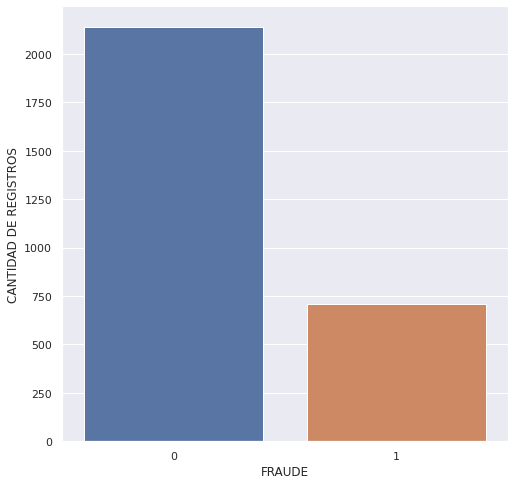

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(x='FRAUDE', data=df)
plt.ylabel("CANTIDAD DE REGISTROS")
plt.show()

In [ ]:
df.describe().round()

,FRAUDE,VALOR,HORA_AUX,Canal1,COD_PAIS,DIASEM,DIAMES,OFICINA_VIN,SEXO,SEGMENTO,EDAD,EGRESOS,NROPAISES,Dist_Mean_NAL,Dist_HOY
count,2848.0,2848.0,2848.0,2848.0,2848.0,2848.0,2848.0,2848.0,2848.0,2848.0,2848.0,2.848000e+03,2848.0,2848.0,2848.0
mean,0.0,505253.0,15.0,1.0,25.0,3.0,14.0,415.0,1.0,4.0,40.0,8.485727e+06,2.0,168.0,4379.0
std,0.0,1002347.0,6.0,0.0,5.0,2.0,9.0,290.0,1.0,1.0,13.0,6.261599e+07,1.0,191.0,1791.0
min,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000000e+00,1.0,0.0,905.0
25%,0.0,88853.0,12.0,1.0,27.0,1.0,4.0,167.0,0.0,4.0,31.0,5.000000e+05,1.0,23.0,4552.0
50%,0.0,243591.0,16.0,1.0,27.0,3.0,15.0,360.0,1.0,4.0,38.0,1.800000e+06,1.0,101.0,4552.0
75%,0.0,500029.0,20.0,1.0,27.0,5.0,21.0,659.0,1.0,5.0,47.0,4.500000e+06,2.0,236.0,4552.0
max,1.0,20014065.0,23.0,1.0,28.0,6.0,31.0,967.0,1.0,5.0,133.0,1.600000e+09,9.0,1218.0,21991.0


**a continuacion se separa el dataset en conjuntos de entrenamiento y testeo**

In [ ]:
X = df.drop(["FRAUDE"], axis=1)
y = df['FRAUDE']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Considerando de antemano el desbalanceo de los datos, se procede a continuacion a balancear los datos utilizando la tecnica SMOTE**

In [ ]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=42)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
from collections import Counter
print ("Distribucion de las clases de las etiquetas antes del remuestreo {}".format(Counter(y_train)))
print ("Distribucion de las clases de las etiquetas despues del remuestreo {}".format(Counter(y_train_res)))

Distribucion de las clases de las etiquetas antes del remuestreo Counter({0: 1709, 1: 569})
Distribucion de las clases de las etiquetas despues del remuestreo Counter({0: 1547, 1: 1547})


***ENTRENAMIENTO DE MODELOS Y SELECCION DEL MEJOR CLASIFICADOR ***

***Primero se estandarizan los datos ***

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.fit_transform(X_test) 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred3 = knn.predict(X_train_res)

# Predecimos sobre nuestro set de test
y_test_pred3 = knn.predict(X_test)

# Comaparamos con las etiquetas reales
print (classification_report(y_test, y_test_pred3))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       430
           1       0.69      0.89      0.78       140

    accuracy                           0.87       570
   macro avg       0.82      0.88      0.84       570
weighted avg       0.89      0.87      0.88       570



**Debido a lo encontrado anteriormente y creyendose que hay un overfitting en el entrenamiento del modelo, se hace a continuacion una validacion cruzada con GridSearch para buscar los mejores hiperparametros para el modelo.**

In [ ]:
k = np.arange(5, 30, 2)

In [ ]:
param_grid = {"n_neighbors" : k}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search2 = GridSearchCV(knn, param_grid, n_jobs = -1, return_train_score = False, cv = 5, refit = False)
grid_search2.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])},
             pre_dispatch='2*n_jobs', refit=False, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print("Los mejores parametros son:", grid_search2.best_params_)

Los mejores parametros son: {'n_neighbors': 5}


In [ ]:
knn_clf=KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_res, y_train_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred4= knn.predict(X_train_res)

# Predecimos sobre nuestro set de test
y_test_pred4 = knn.predict(X_test)

# Comaparamos con las etiquetas reales
print (classification_report(y_test, y_test_pred4))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       430
           1       0.69      0.89      0.78       140

    accuracy                           0.87       570
   macro avg       0.82      0.88      0.84       570
weighted avg       0.89      0.87      0.88       570



**Finalmente y teniendo en cuenta las evaluaciones anteriores con el performance da cada modelo, se escoje el KNN como el modelo con mejor performance para las predicciones de los Fraudes**

***A continuacion se procede a Realizar la limpieza de la data con la que se pondra a prueba el modelo seleccionado ***

In [ ]:
df_test=pd.read_excel("/content/drive/My Drive/Data Science_ACÁMICA/Prueba de aprendizaje_IMPORTANTE/test.xlsx", parse_dates = ['FECHA', 'FECHA_VIN'])
df_test=df_test.drop(["id", 'CANAL'], axis=1)
df_test.head()

,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,Canal1,FECHA,COD_PAIS,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,SEXO,SEGMENTO,EDAD,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
0,NaN,851725.68,21,167.78,POS,2015-05-19,US,2,19,1991-07-01,859,M,Preferencial,57,4000000,23000000,5,37020.71,4627.59,8455.65,7,107.29,4552.41,1823.87
1,NaN,85239.07,8,131.63,POS,2015-05-22,US,5,22,2002-02-22,543,F,Preferencial,37,7900000,4000000,1,NaN,NaN,NaN,2,131.63,4552.41,526.53
2,NaN,85477.45,18,455.13,ATM_INT,2015-05-22,PA,5,22,2007-07-27,317,M,Emprendedor,47,2500000,1500000,1,NaN,NaN,NaN,3,399.46,1043.91,2396.79
3,NaN,854839.89,16,243.62,POS,2015-05-19,US,2,19,1995-01-27,344,M,Preferencial,40,23000000,10000000,1,NaN,NaN,NaN,3,163.01,4552.41,489.03
4,NaN,85771.79,1,1.00,POS,2015-05-12,DO,2,12,1991-12-01,52,M,Preferencial,63,13000000,13000000,3,17720.84,4430.21,4552.41,1,NaN,1674.20,1.00


In [ ]:
df_test = df_test.drop(columns = ['Dist_Max_INTER','Dist_max_NAL','INGRESOS','Dist_Sum_INTER', "NROCIUDADES", 'Dist_sum_NAL', 'Dist_Mean_INTER', "FECHA", "FECHA_VIN"],axis = 1)
df_test.head()

,FRAUDE,VALOR,HORA_AUX,Canal1,COD_PAIS,DIASEM,DIAMES,OFICINA_VIN,SEXO,SEGMENTO,EDAD,EGRESOS,NROPAISES,Dist_Mean_NAL,Dist_HOY
0,NaN,851725.68,21,POS,US,2,19,859,M,Preferencial,57,23000000,5,107.29,4552.41
1,NaN,85239.07,8,POS,US,5,22,543,F,Preferencial,37,4000000,1,131.63,4552.41
2,NaN,85477.45,18,ATM_INT,PA,5,22,317,M,Emprendedor,47,1500000,1,399.46,1043.91
3,NaN,854839.89,16,POS,US,2,19,344,M,Preferencial,40,10000000,1,163.01,4552.41
4,NaN,85771.79,1,POS,DO,2,12,52,M,Preferencial,63,13000000,3,NaN,1674.20


In [ ]:
temp = df_test['Dist_Mean_NAL']
temp.loc[df_test.Dist_Mean_NAL.isna()] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
df_test.OFICINA_VIN.fillna(method='bfill', inplace = True) 

df_test.SEXO.fillna(method='bfill', inplace = True) 

df_test.SEGMENTO.fillna(method='bfill', inplace = True)

df_test.EDAD.fillna(df.EDAD.mean(), inplace = True)

df_test.EGRESOS.fillna(df.EGRESOS.mean(), inplace = True)

df_test.isna().sum()

FRAUDE           117
VALOR              0
HORA_AUX           0
Canal1             0
COD_PAIS           0
DIASEM             0
DIAMES             0
OFICINA_VIN        0
SEXO               0
SEGMENTO           0
EDAD               0
EGRESOS            0
NROPAISES          0
Dist_Mean_NAL      0
Dist_HOY           0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
le.fit(df_test['SEXO'])
df_test['SEXO'] = le.fit_transform(df_test['SEXO'])

le.fit(df_test['SEGMENTO'])
df_test['SEGMENTO'] = le.fit_transform(df_test['SEGMENTO'])

le.fit(df_test['COD_PAIS'])
df_test['COD_PAIS'] = le.fit_transform(df_test['COD_PAIS'])

le.fit(df_test['Canal1'])
df_test['Canal1'] = le.fit_transform(df_test['Canal1'])

df_test.head()

,FRAUDE,VALOR,HORA_AUX,Canal1,COD_PAIS,DIASEM,DIAMES,OFICINA_VIN,SEXO,SEGMENTO,EDAD,EGRESOS,NROPAISES,Dist_Mean_NAL,Dist_HOY
0,NaN,851725.68,21,1,7,2,19,859,1,4,57,23000000,5,107.29,4552.41
1,NaN,85239.07,8,1,7,5,22,543,0,4,37,4000000,1,131.63,4552.41
2,NaN,85477.45,18,0,4,5,22,317,1,0,47,1500000,1,399.46,1043.91
3,NaN,854839.89,16,1,7,2,19,344,1,4,40,10000000,1,163.01,4552.41
4,NaN,85771.79,1,1,2,2,12,52,1,4,63,13000000,3,0.00,1674.20


**Ya teniendo la data de test limpia se procede a continuacion a realizar la prediccion con los datos nuevos para finalizar**

In [ ]:
clf_final=knn_clf #se instancia el modelo que se escogio para la prediccion

In [ ]:
X = df_test.drop(["FRAUDE"], axis=1)
X.head(5)

,VALOR,HORA_AUX,Canal1,COD_PAIS,DIASEM,DIAMES,OFICINA_VIN,SEXO,SEGMENTO,EDAD,EGRESOS,NROPAISES,Dist_Mean_NAL,Dist_HOY
0,851725.68,21,1,7,2,19,859,1,4,57,23000000,5,107.29,4552.41
1,85239.07,8,1,7,5,22,543,0,4,37,4000000,1,131.63,4552.41
2,85477.45,18,0,4,5,22,317,1,0,47,1500000,1,399.46,1043.91
3,854839.89,16,1,7,2,19,344,1,4,40,10000000,1,163.01,4552.41
4,85771.79,1,1,2,2,12,52,1,4,63,13000000,3,0.00,1674.20


**Se hace el escalamiento de los datos para la evaluacion del modelo con StandardScaler**

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
pred = clf_final.predict(X)
pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1])

**A continuacion se procede a rellenar la columna FRAUDE con los valores predichos por el modelo**

In [ ]:
df_test["FRAUDE"]=pred
df_test.head()

,FRAUDE,VALOR,HORA_AUX,Canal1,COD_PAIS,DIASEM,DIAMES,OFICINA_VIN,SEXO,SEGMENTO,EDAD,EGRESOS,NROPAISES,Dist_Mean_NAL,Dist_HOY
0,0,851725.68,21,1,7,2,19,859,1,4,57,23000000,5,107.29,4552.41
1,1,85239.07,8,1,7,5,22,543,0,4,37,4000000,1,131.63,4552.41
2,1,85477.45,18,0,4,5,22,317,1,0,47,1500000,1,399.46,1043.91
3,1,854839.89,16,1,7,2,19,344,1,4,40,10000000,1,163.01,4552.41
4,0,85771.79,1,1,2,2,12,52,1,4,63,13000000,3,0.00,1674.20


**Con el siguente codigo se exporta la data a un archivo csv para ser enviado a revision**

In [ ]:
df_test.to_csv("/content/drive/My Drive/Data Science/Prueba de aprendizaje_IMPORTANTE/test_final3.csv", header=True, index=False)